In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


# Dataset

In [3]:
df=pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

# EDA

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
df.count()

fixed acidity           1143
volatile acidity        1143
citric acid             1143
residual sugar          1143
chlorides               1143
free sulfur dioxide     1143
total sulfur dioxide    1143
density                 1143
pH                      1143
sulphates               1143
alcohol                 1143
quality                 1143
Id                      1143
dtype: int64

In [7]:
mean_df=df.mean()
median_df=df.median()

summary=pd.concat([mean_df,median_df],axis=1)
summary.columns=["mean","median"]

In [8]:
summary

,mean,median
fixed acidity,8.311111,7.90000
volatile acidity,0.531339,0.52000
citric acid,0.268364,0.25000
residual sugar,2.532152,2.20000
chlorides,0.086933,0.07900
free sulfur dioxide,15.615486,13.00000
total sulfur dioxide,45.914698,37.00000
density,0.996730,0.99668
pH,3.311015,3.31000
sulphates,0.657708,0.62000


**NaN Control**

In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

**Drop Id**

In [10]:
df=df.drop(['Id'],axis=1)

# Alcohol Category Create

In [11]:
def alcohol_category(alc):
    if alc >= 10.2:
        return "high alcohol"
    else:
        return "low alcohol"

df["alcohol_ratio"] = df["alcohol"].apply(alcohol_category)
        

# Correlation

Text(0.5, 1.0, 'Correlation Heatmap')

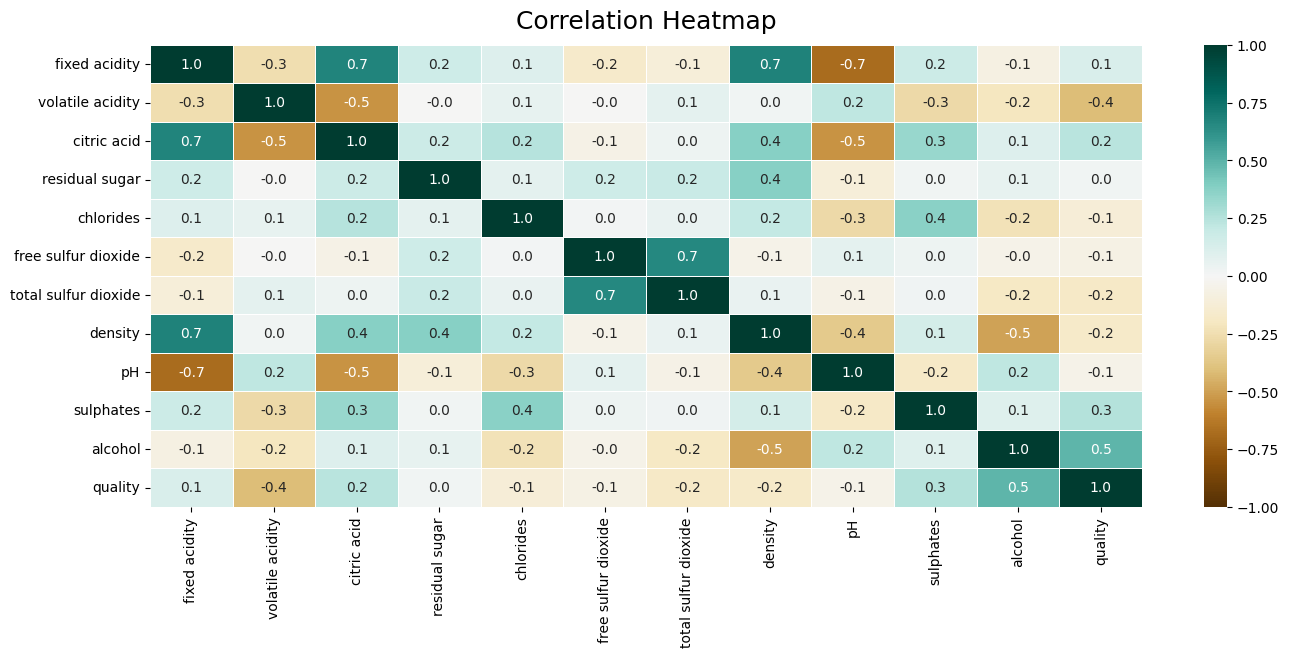

In [12]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, linewidths = 0.5,fmt='.1f',cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':18}, pad=12)


In [13]:
high_alc_values= (df['alcohol_ratio'] == 'high alcohol').sum()
low_alc_values= (df['alcohol_ratio'] == 'low alcohol').sum()
print(f"High Alcohol: {high_alc_values} \nLow Alcohol: {low_alc_values}")

High Alcohol: 575 
Low Alcohol: 568


Text(0.5, 1.0, 'Fixed Acidity')

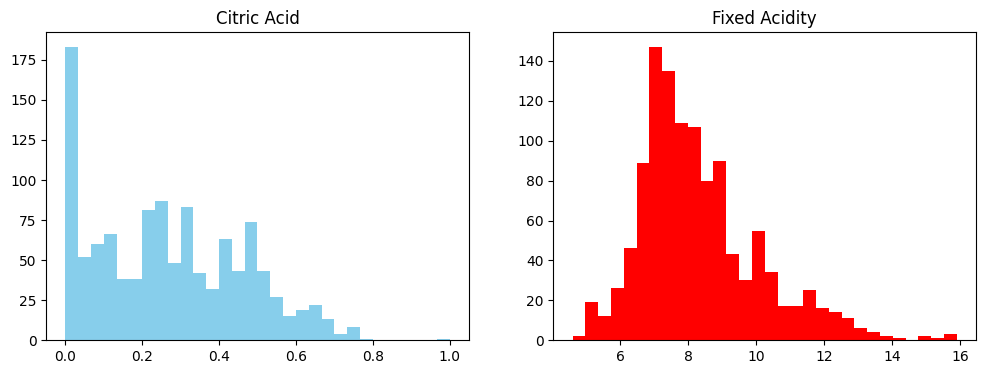

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(df['citric acid'], bins=30, color="skyblue")
axes[0].set_title('Citric Acid')

axes[1].hist(df['fixed acidity'], bins=30, color='red')
axes[1].set_title('Fixed Acidity')

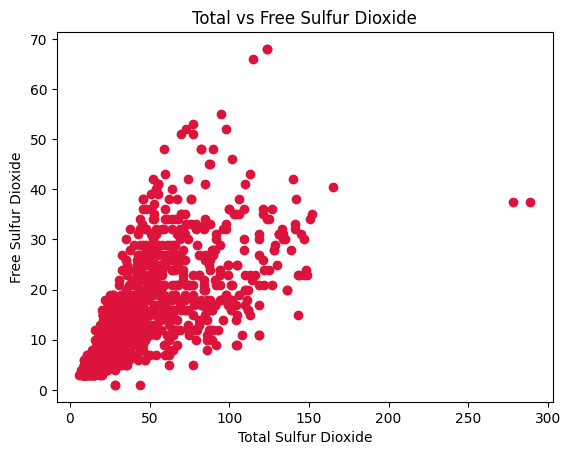

In [15]:
plt.scatter(df['total sulfur dioxide'],df['free sulfur dioxide'], color="crimson")
plt.xlabel("Total Sulfur Dioxide")
plt.ylabel("Free Sulfur Dioxide")
plt.title("Total vs Free Sulfur Dioxide")
plt.show()